# TANZIANA TOURISM PREDICTION

## INTRODUCTION

Tanzania is a country in East Africa with many tourist attractions.
There are 17 national parks in Tanzania, 29 game reserves, 40 game-controlled areas, marine parks and conservation area.
Tanzania is also home to Mount Kilimanjaro,t he highest mountain in Africa.

Let's predict how much money a tourist will spend when visiting Tanzania using tourism survey data and ML.

<img src="Giraffe_tanz.jpg" style="width:680px;height:380px"/>

## DATA PREPARATION AND ANALYSIS

### Importing Libraries and DataSets

In [1]:
# Importing Libraries

import numpy as np # for scientific computing
import pandas as pd # for data manipulation, analysis and cleaning
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from matplotlib import style # for data visualization
style.use('ggplot')
sns.set_style('darkgrid')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error

print("Done importing libraries...")

Done importing libraries...


In [2]:
#Loading Datasets

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("Done loading dataset!!")

Done loading dataset!!


In [3]:
#Copying Datasets

train = train_df.copy()
test = test_df.copy()

print("Done copying datasets!!")

Done copying datasets!!


In [27]:
#Merging Datasets

train_df['train']= 1
test_df['train']= 0
dataset = [train_df,test_df]
all_data = pd.concat(dataset)

print("Done merging datasets!!")

Done merging datasets!!


### Data Exploration

In [6]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [28]:
# a glimpse of the training dataset (viewing the first 5 rows)

train_df.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,total,train
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,No,No,No,13.0,0.0,Cash,No,674602.5,2.0,1
1,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,No,No,No,14.0,7.0,Cash,Yes,3214906.5,1.0,1
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,No,No,No,1.0,31.0,Cash,No,3315000.0,1.0,1
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,Yes,Yes,No,11.0,0.0,Cash,Yes,7790250.0,2.0,1
4,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,No,No,No,7.0,4.0,Cash,Yes,1657500.0,1.0,1


In [8]:
# a glimpse of the test dataset (viewing the last 5 rows)

test_df.tail()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
1596,tour_988,UNITED STATES OF AMERICA,25-44,NaN,0.0,1.0,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,No,1,0,Cash,No,NaN
1597,tour_990,ITALY,45-64,Spouse and Children,3.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,10,5,Other,Yes,Wildlife
1598,tour_992,FINLAND,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,No,No,6,0,Cash,Yes,No comments
1599,tour_996,SOUTH AFRICA,24-Jan,Alone,0.0,1.0,Business,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,4,0,Cash,Yes,Wildlife
1600,tour_998,SOUTH AFRICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Cultural tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,9,5,Cash,Yes,Friendly People


In [9]:
#Dataset Size

print(f"Train_df has {train_df.shape[0]} rows and {train_df.shape[1]} columns.\nTest_df has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")

Train_df has 4809 rows and 23 columns.
Test_df has 1601 rows and 22 columns.


In [10]:
#Dataset Summary

def datasum(df):
    '''
    This function generates a DataFrame that summarises
    the dataset showing the columns,data types, number 
    of missing values, number of unique values, first 
    and second value.
    '''
    print(f"Dataset size: {df.shape}")
    sumr = pd.DataFrame(df.dtypes, columns=["dtypes"])
    sumr = sumr.reset_index()
    sumr['Name'] = sumr['index']
    sumr = sumr[['Name','dtypes']]
    sumr['Missing'] = df.isnull().sum().values
    sumr['Unique'] = df.nunique().values
    sumr['First_Value'] = df.loc[0].values
    sumr['Second_Value'] = df.loc[1].values
   
    return sumr

In [11]:
view_sum = datasum(train_df)
view_sum

Dataset size: (4809, 23)


,Name,dtypes,Missing,Unique,First_Value,Second_Value
0,ID,object,0,4809,tour_0,tour_10
1,country,object,0,105,SWIZERLAND,UNITED KINGDOM
2,age_group,object,0,4,45-64,25-44
3,travel_with,object,1114,5,Friends/Relatives,NaN
4,total_female,float64,3,14,1,1
5,total_male,float64,5,14,1,0
6,purpose,object,0,7,Leisure and Holidays,Leisure and Holidays
7,main_activity,object,0,9,Wildlife tourism,Cultural tourism
8,info_source,object,0,8,"Friends, relatives",others
9,tour_arrangement,object,0,2,Independent,Independent


In [10]:
view_sumr = datasum(test_df)
view_sumr

Dataset size: (1601, 22)


,Name,dtypes,Missing,Unique,First_Value,Second_Value
0,ID,object,0,1601,tour_1,tour_100
1,country,object,0,87,AUSTRALIA,SOUTH AFRICA
2,age_group,object,0,4,45-64,25-44
3,travel_with,object,327,5,Spouse,Friends/Relatives
4,total_female,float64,1,13,1,0
5,total_male,float64,2,10,1,4
6,purpose,object,0,7,Leisure and Holidays,Business
7,main_activity,object,0,9,Wildlife tourism,Wildlife tourism
8,info_source,object,0,8,"Travel, agent, tour operator",Tanzania Mission Abroad
9,tour_arrangement,object,0,2,Package Tour,Package Tour


In [12]:
train_df.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [13]:
def sumt(df):
    '''
    This function creates a new column
    from the addition of two columns
    '''
    data = df
    data['total']  = data['total_female'] + data['total_male']
    return data

In [14]:
#Handling Missing Values

def dataclean(df):
    '''
    This function handles missing values in 'travel_with'
    column ensuring that family size of 1 is mapped as
    'Alone' in 'travel_with' column.
    '''
    data = df
    missing = data['travel_with'].isna()
    mapping_dict = dict({ 1: 'Alone', 2: 'Spouse'})
    data.loc[missing, 'travel_with'] = data.loc[missing, 'total'].map(mapping_dict)
    return data

In [29]:
train_df = sumt(train_df)
test_df = sumt(test_df)
all_data = sumt(all_data)

In [30]:
train_df = dataclean(train_df)
test_df = dataclean(test_df)
all_data = dataclean(all_data)

In [17]:
def unique_val(df):
    '''
    This function retrieves unique values
    '''
    data = df
    cols = ['country', 'age_group', 'travel_with',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'payment_mode',
       'first_trip_tz']
    dic_uni = {}
    for col in cols:
        dic_uni[col] = dic_uni.get(col,data[col].unique())
    return dic_uni

In [18]:
unique_val(train_df)

{'country': array(['SWIZERLAND', 'UNITED KINGDOM', 'CHINA', 'SOUTH AFRICA',
        'UNITED STATES OF AMERICA', 'NIGERIA', 'INDIA', 'BRAZIL', 'CANADA',
        'MALT', 'MOZAMBIQUE', 'RWANDA', 'AUSTRIA', 'MYANMAR', 'GERMANY',
        'KENYA', 'ALGERIA', 'IRELAND', 'DENMARK', 'SPAIN', 'FRANCE',
        'ITALY', 'EGYPT', 'QATAR', 'MALAWI', 'JAPAN', 'SWEDEN',
        'NETHERLANDS', 'UAE', 'UGANDA', 'AUSTRALIA', 'YEMEN',
        'NEW ZEALAND', 'BELGIUM', 'NORWAY', 'ZIMBABWE', 'ZAMBIA', 'CONGO',
        'BURGARIA', 'PAKISTAN', 'GREECE', 'MAURITIUS', 'DRC', 'OMAN',
        'PORTUGAL', 'KOREA', 'SWAZILAND', 'TUNISIA', 'KUWAIT', 'DOMINICA',
        'ISRAEL', 'FINLAND', 'CZECH REPUBLIC', 'UKRAIN', 'ETHIOPIA',
        'BURUNDI', 'SCOTLAND', 'RUSSIA', 'GHANA', 'NIGER', 'MALAYSIA',
        'COLOMBIA', 'LUXEMBOURG', 'NEPAL', 'POLAND', 'SINGAPORE',
        'LITHUANIA', 'HUNGARY', 'INDONESIA', 'TURKEY', 'TRINIDAD TOBACCO',
        'IRAQ', 'SLOVENIA', 'UNITED ARAB EMIRATES', 'COMORO', 'SRI LANKA',
    

In [19]:
unique_val(test_df)

{'country': array(['AUSTRALIA', 'SOUTH AFRICA', 'GERMANY', 'CANADA', 'UNITED KINGDOM',
        'DENMARK', 'RUSSIA', 'FRANCE', 'SPAIN', 'SWIZERLAND',
        'UNITED STATES OF AMERICA', 'CHINA', 'INDIA', 'ZAMBIA',
        'NEW ZEALAND', 'COMORO', 'NETHERLANDS', 'MALAYSIA', 'KENYA',
        'ITALY', 'FINLAND', 'MALAWI', 'BELGIUM', 'NORWAY', 'MALT',
        'ETHIOPIA', 'OMAN', 'CZECH REPUBLIC', 'GHANA', 'UAE', 'PORTUGAL',
        'SINGAPORE', 'SWEDEN', 'UGANDA', 'BRAZIL', 'QATAR', 'UKRAIN',
        'ROMANIA', 'DRC', 'HUNGARY', 'RWANDA', 'AUSTRIA', 'BOTSWANA',
        'ZIMBABWE', 'IRELAND', 'JAPAN', 'IRAN', 'MOZAMBIQUE', 'SWAZILAND',
        'BULGARIA', 'ISRAEL', 'CHILE', 'SUDAN', 'BANGLADESH', 'SLOVAKIA',
        'COSTARICA', 'NAMIBIA', 'POLAND', 'DOMINICA', 'SCOTLAND', 'HAITI',
        'PAKISTAN', 'TAIWAN', 'PHILIPINES', 'VIETNAM', 'SERBIA', 'BURUNDI',
        'BOSNIA', 'LIBERIA', 'PERU', 'GREECE', 'INDONESIA', 'LEBANON',
        'CAPE VERDE', 'JAMAICA', 'UNITED ARAB EMIRATES', 'MORROCO'

In [20]:
train_miss = pd.concat([train_df.isnull().sum(), (train_df.isnull().sum() * 100 / len(train_df))], axis = 1,
                        keys = ['Values missing', 'Percent of missing'])
train_miss.loc[train_miss['Values missing'] > 0].sort_values(ascending = False, by = 'Values missing').style.background_gradient('Blues')


,Values missing,Percent of missing
most_impressing,313,6.508630
travel_with,15,0.311915
total,8,0.166355
total_male,5,0.103972
total_female,3,0.062383


In [21]:
test_miss = pd.concat([test_df.isnull().sum(), (test_df.isnull().sum() * 100 / len(test_df))], axis = 1,
                        keys = ['Values missing', 'Percent of missing'])
test_miss.loc[test_miss['Values missing'] > 0].sort_values(ascending = False, by = 'Values missing').style.background_gradient('Blues')


,Values missing,Percent of missing
most_impressing,111,6.933167
travel_with,5,0.312305
total,3,0.187383
total_male,2,0.124922
total_female,1,0.062461


In [24]:
#Handling features not required for Modelling

train_df = train_df.drop(['most_impressing','ID'], axis = 1)
test_df = test_df.drop(['most_impressing','ID'], axis = 1)
all_data = all_data.drop(['most_impressing','ID'], axis = 1)

print('Done removing columns')

Done removing columns


In [31]:
from IPython.display import display

display(all_data[all_data['total'].isnull()])

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,total,train
490,FRANCE,25-44,Friends/Relatives,NaN,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,...,Yes,Yes,Yes,9.0,5.0,Cash,Yes,313000.0,NaN,1
545,ITALY,1-24,Friends/Relatives,NaN,4.0,Volunteering,Wildlife tourism,"Friends, relatives",Independent,No,...,No,No,No,15.0,0.0,Cash,Yes,9077320.0,NaN,1
1017,UNITED STATES OF AMERICA,45-64,Friends/Relatives,4.0,NaN,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,Yes,Yes,No,19.0,0.0,Cash,Yes,7293000.0,NaN,1
1261,FRANCE,25-44,Friends/Relatives,NaN,1.0,Leisure and Holidays,Wildlife tourism,"Newspaper, magazines,brochures",Package Tour,Yes,...,Yes,Yes,Yes,7.0,7.0,Cash,Yes,324300.0,NaN,1
1473,SPAIN,45-64,Friends/Relatives,7.0,NaN,Other,Hunting tourism,"Travel, agent, tour operator",Package Tour,No,...,No,No,Yes,11.0,0.0,Cash,No,56960183.0,NaN,1
2449,SOUTH AFRICA,25-44,Friends/Relatives,0.0,NaN,Meetings and Conference,Wildlife tourism,"Newspaper, magazines,brochures",Independent,No,...,No,No,No,4.0,0.0,Credit Card,Yes,3978000.0,NaN,1
2494,FRANCE,25-44,NaN,0.0,NaN,Leisure and Holidays,Conference tourism,"Radio, TV, Web",Package Tour,Yes,...,Yes,Yes,Yes,6.0,0.0,Cash,Yes,4309500.0,NaN,1
3984,CHINA,25-44,Friends/Relatives,10.0,NaN,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,...,Yes,Yes,Yes,4.0,2.0,Cash,Yes,89505000.0,NaN,1
54,GERMANY,45-64,Friends/Relatives,4.0,NaN,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,...,Yes,Yes,Yes,23.0,0.0,Cash,No,NaN,NaN,0
511,FRANCE,25-44,Friends/Relatives,NaN,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,...,No,Yes,No,9.0,5.0,Cash,Yes,NaN,NaN,0


In [33]:
all_data[['travel_with','total_female']].groupby(['travel_with'])['total_female'].max()

travel_with
Alone                  12.0
Children               49.0
Friends/Relatives      20.0
Spouse                 11.0
Spouse and Children     7.0
Name: total_female, dtype: float64

In [37]:
#Handling Missing Values

def data_prep(dataset):
    '''
    this function handles missing data for both train and test dataset
    '''

    clean_df = dataset
    
    clean_df['travel_with'].fillna('Friends/Relatives', inplace=True)

    # replace missing females by the mean of females who belong to the same group of travel_with
    clean_df['total_female'] = clean_df.groupby(['travel_with'])['total_female'].transform(lambda x: x.fillna(round(x.mean(),0)))   
    
    # replace missing males by the mean of males who belong to the same group of travel_with
    clean_df['total_male'] = clean_df.groupby(['travel_with'])['total_male'].transform(lambda x: x.fillna(round(x.mean(),0))) 
    
    return clean_df

In [38]:
train_df = data_prep(train_df)
test_df = data_prep(test_df)
all_data = data_prep(all_data)

In [39]:
train_df.isnull().sum()

country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
total_cost               0
total                    8
train                    0
dtype: int64

In [43]:
# Cleaning up the travel_with feature of the test dataset

all_data.loc[((all_data['total_female'] == 11) & (all_data['travel_with'] == 'Spouse')), 'total_female'] = 1

In [83]:
train_df[['travel_with','total_female']].groupby(['travel_with'])['total_female'].max()

travel_with
Alone                  12.0
Children               49.0
Friends/Relatives      15.0
Spouse                  4.0
Spouse and Children     7.0
Name: total_female, dtype: float64

In [85]:
train_df[(train_df['total'] > 2) & (train_df['travel_with'] == 'Spouse')]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,total
442,tour_1543,UNITED KINGDOM,1-24,Spouse,2.0,2.0,Visiting Friends and Relatives,Beach tourism,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,0.0,60.0,Cash,No,200000.00,4.0
504,tour_1620,BELGIUM,65+,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,No,No,14.0,0.0,Cash,Yes,7715722.00,12.0
1413,tour_2737,FRANCE,45-64,Spouse,1.0,2.0,Visiting Friends and Relatives,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,9.0,5.0,Cash,Yes,9945000.00,3.0
1483,tour_2824,FRANCE,25-44,Spouse,1.0,2.0,Leisure and Holidays,Bird watching,"Travel, agent, tour operator",Package Tour,...,No,No,No,No,9.0,3.0,Cash,Yes,1657500.00,3.0
1787,tour_3176,SPAIN,45-64,Spouse,2.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,13.0,0.0,Cash,Yes,745875.00,3.0
2583,tour_4148,ITALY,25-44,Spouse,4.0,3.0,Leisure and Holidays,Beach tourism,"Travel, agent, tour operator",Package Tour,...,No,No,No,No,0.0,14.0,Cash,Yes,42775102.50,7.0
2648,tour_4236,KENYA,25-44,Spouse,1.0,2.0,Visiting Friends and Relatives,Hunting tourism,others,Independent,...,No,No,No,No,3.0,0.0,Cash,No,275495.22,3.0
2693,tour_4283,SPAIN,45-64,Spouse,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,No,No,4.0,3.0,Cash,Yes,15885310.00,4.0
3559,tour_5314,ZIMBABWE,45-64,Spouse,2.0,1.0,Other,Hunting tourism,Tanzania Mission Abroad,Independent,...,No,No,No,No,3.0,0.0,Cash,Yes,1494200.00,3.0
3693,tour_5474,FRANCE,25-44,Spouse,2.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,10.0,11.0,Cash,Yes,19890000.00,3.0


In [40]:
all_data.loc[((all_data['total_female'] > 2) & (all_data['total_male'] > 2) & (all_data['travel_with'] == 'Spouse')), 'travel_with'] = "Spouse and Children"

In [44]:
all_data[['travel_with','total_female']].groupby(['travel_with'])['total_female'].max()

travel_with
Alone                  12.0
Children               49.0
Friends/Relatives      20.0
Spouse                  2.0
Spouse and Children     7.0
Name: total_female, dtype: float64

In [41]:
all_data[((all_data['total_female'] > 2) & (all_data['total_male'] > 2) & (all_data['travel_with'] == 'Spouse'))]

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,total,train


In [46]:
all_data.loc[(all_data['total'] > 1) & (all_data['travel_with'] == 'Alone'),'travel_with']="Friends/Relatives"

In [50]:
all_data.loc[(all_data['total_female'] == 1)& (all_data['total_male'] == 0) & (all_data['travel_with'] == 'Spouse'), 'total_male']= 1

In [51]:
all_data.loc[(all_data['total_female'] == 0)& (all_data['total_male'] == 1) & (all_data['travel_with'] == 'Spouse'), 'total_female']= 1

In [53]:
all_data[(all_data['total'] == 1) & (all_data['travel_with'] != 'Alone')  & (all_data['travel_with'] != 'Spouse')]

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,total,train
526,FRANCE,45-64,Friends/Relatives,0.0,1.0,Leisure and Holidays,Diving and Sport Fishing,"Friends, relatives",Package Tour,Yes,...,Yes,Yes,Yes,9.0,0.0,Cash,Yes,1657500.0,1.0,1
828,UNITED KINGDOM,1-24,Friends/Relatives,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,Yes,Yes,No,12.0,0.0,Cash,Yes,25194000.0,1.0,1
1086,JAPAN,25-44,Friends/Relatives,0.0,1.0,Meetings and Conference,Wildlife tourism,Trade fair,Independent,No,...,No,No,No,2.0,0.0,Cash,Yes,248625.0,1.0,1
1116,UNITED STATES OF AMERICA,25-44,Friends/Relatives,1.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,...,No,No,No,10.0,5.0,Cash,No,900000.0,1.0,1
1200,DENMARK,1-24,Friends/Relatives,1.0,0.0,Leisure and Holidays,Conference tourism,"Travel, agent, tour operator",Package Tour,Yes,...,No,Yes,Yes,10.0,6.0,Cash,Yes,76742250.0,1.0,1
1565,NORWAY,25-44,Friends/Relatives,1.0,0.0,Meetings and Conference,Wildlife tourism,"Newspaper, magazines,brochures",Independent,No,...,No,No,No,5.0,0.0,Credit Card,Yes,2734875.0,1.0,1
1783,UNITED STATES OF AMERICA,65+,Children,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,...,Yes,Yes,Yes,10.0,0.0,Credit Card,Yes,8287500.0,1.0,1
2343,ZIMBABWE,25-44,Friends/Relatives,0.0,1.0,Other,Hunting tourism,others,Independent,No,...,No,No,No,1.0,0.0,Cash,No,497250.0,1.0,1
3180,FRANCE,25-44,Friends/Relatives,0.0,1.0,Leisure and Holidays,Conference tourism,"Friends, relatives",Package Tour,Yes,...,No,No,No,0.0,0.0,Cash,Yes,6795750.0,1.0,1
3451,ZAMBIA,45-64,Friends/Relatives,0.0,1.0,Business,Beach tourism,"Friends, relatives",Independent,No,...,No,No,No,3.0,0.0,Cash,No,50000.0,1.0,1


In [61]:
all_data[['travel_with','total_male']].groupby(['travel_with'])['total_male'].mean()

travel_with
Alone                  0.612378
Children               1.534562
Friends/Relatives      1.639871
Spouse                 1.005755
Spouse and Children    1.865031
Name: total_male, dtype: float64

In [59]:
all_data[['travel_with','total_female']].groupby(['travel_with'])['total_female'].mean()

travel_with
Alone                  0.386319
Children               1.557604
Friends/Relatives      1.652733
Spouse                 1.002878
Spouse and Children    1.977505
Name: total_female, dtype: float64

In [60]:
all_data.loc[(all_data['total_female'] == 0) & (all_data['travel_with']=='Friends/Relatives')&(all_data['total_male'] == 1),'total_female'] = 2

In [62]:
all_data.loc[(all_data['total_female'] == 1) & (all_data['travel_with']=='Friends/Relatives')&(all_data['total_male'] == 0),'total_male'] = 2

In [63]:
all_data.loc[(all_data['total_female'] == 0) & (all_data['travel_with']=='Children')&(all_data['total_male'] == 1),'total_female'] = 2

In [64]:
# Cleaning up the age_group feature of the test dataset
all_data['age_group'].replace({'24-Jan':'1-24'}, inplace=True)

In [65]:
all_data['age_group'].unique()

array(['45-64', '25-44', '1-24', '65+'], dtype=object)

In [66]:
#Handling features not required for Modelling

all_data = all_data.drop(['total'],axis = 1)

print('Done removing total column')

Done removing total column


In [69]:
all_data.isnull().sum()

country                     0
age_group                   0
travel_with                 0
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
total_cost               1601
train                       0
dtype: int64

In [70]:
train_df = all_data[all_data['train']== 1]
test_df = all_data[all_data['train']== 0]

### Data Visualization

<AxesSubplot:xlabel='travel_with', ylabel='count'>

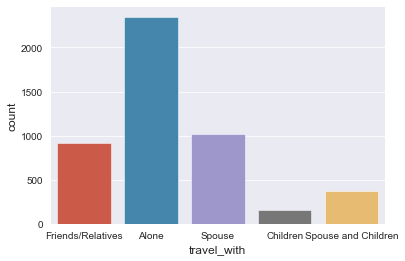

In [71]:
sns.countplot(x="travel_with", data=train_df)

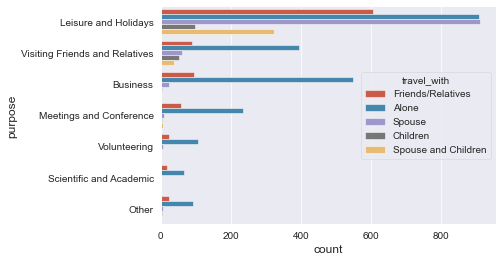

In [72]:
sns.countplot(y="purpose", hue='travel_with', data=train_df)
plt.show()

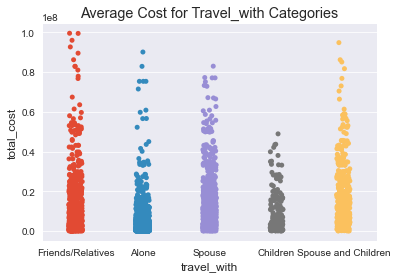

In [73]:
sns.stripplot(x='travel_with', y= 'total_cost', data=train_df)
plt.title('Average Cost for Travel_with Categories')
plt.show()

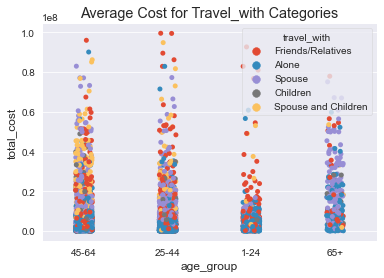

In [74]:
sns.stripplot(x='age_group', y= 'total_cost',hue='travel_with', data=train_df)
plt.title('Average Cost for Travel_with Categories')
plt.show()

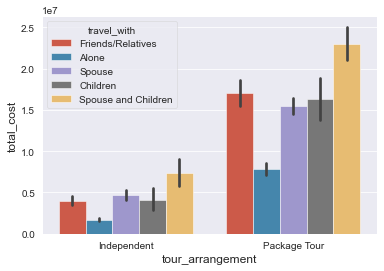

In [76]:
sns.barplot(x="tour_arrangement", y="total_cost",hue='travel_with', data=train_df)
plt.show()

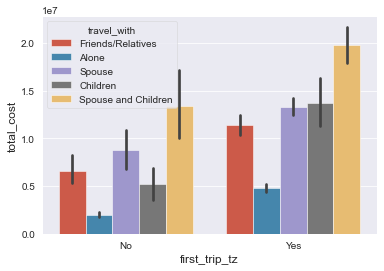

In [79]:
sns.barplot(x="first_trip_tz", y="total_cost",hue='travel_with', data=train_df)
plt.show()

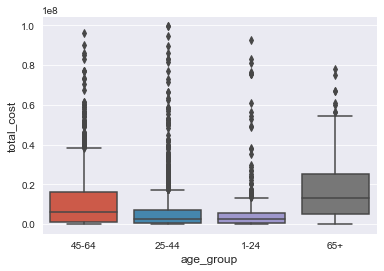

In [80]:
sns.boxplot(x="age_group", y="total_cost", data=train_df)
plt.show()

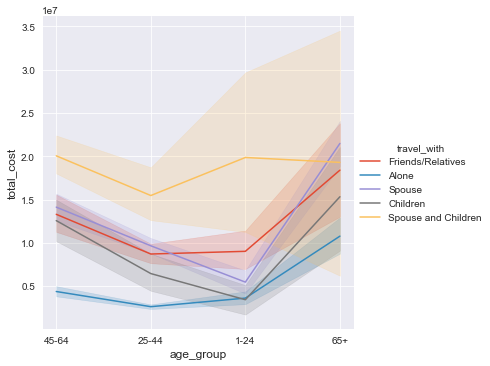

In [81]:
sns.relplot(x="age_group", y="total_cost", hue='travel_with',kind='line', data=train_df)

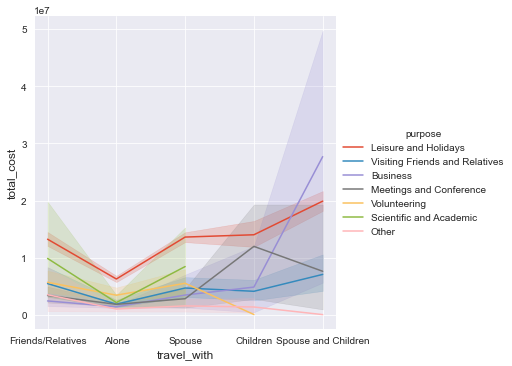

In [84]:
sns.relplot(x="travel_with", y="total_cost", hue='purpose',kind='line', data=train_df)
plt.show()

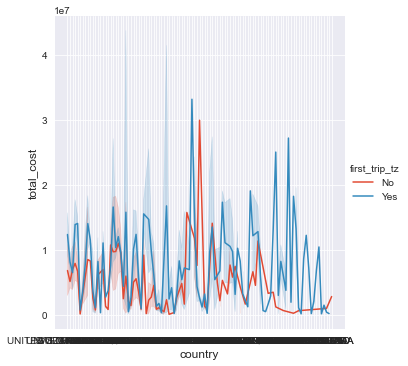

In [85]:
sns.relplot(x="country", y="total_cost", hue='first_trip_tz', kind="line", data=train_df)
plt.show()

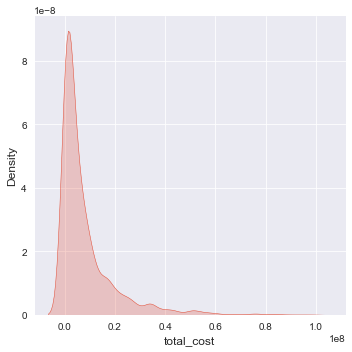

In [86]:
sns.displot(train_df, x="total_cost", kind="kde", fill=True)
plt.show()

### Data Preprocessing

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

le = LabelEncoder()
minmax = MinMaxScaler()

print('Done importing..')

Done importing..


In [99]:
#Merging Datasets

dataset = [train_df,test_df]
all_data = pd.concat(dataset)

print("Done merging datasets!!")

Done merging datasets!!


In [91]:
def transform(dataset):
    dtf = dataset
    
    cols = ['country']
    dtf[cols] = dtf[cols].apply(le.fit_transform)    
    return dtf

In [89]:
cols = ['age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'payment_mode',
       'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 
       'first_trip_tz']
all_data = pd.get_dummies(all_data, columns= cols)

In [92]:
all_data = transform(all_data)

In [93]:
all_data.head()

,country,total_female,total_male,night_mainland,night_zanzibar,total_cost,train,age_group_1-24,age_group_25-44,age_group_45-64,...,package_transport_tz_No,package_transport_tz_Yes,package_sightseeing_No,package_sightseeing_Yes,package_guided_tour_No,package_guided_tour_Yes,package_insurance_No,package_insurance_Yes,first_trip_tz_No,first_trip_tz_Yes
0,101,1.0,1.0,13.0,0.0,674602.5,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
1,111,1.0,0.0,14.0,7.0,3214906.5,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
2,111,0.0,1.0,1.0,31.0,3315000.0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
3,111,1.0,1.0,11.0,0.0,7790250.0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
4,17,1.0,0.0,7.0,4.0,1657500.0,1,1,0,0,...,1,0,1,0,1,0,1,0,0,1


In [94]:
all_data[['country']] = minmax.fit_transform(all_data[['country']])

In [96]:
all_data.head()

,country,total_female,total_male,night_mainland,night_zanzibar,total_cost,train,age_group_1-24,age_group_25-44,age_group_45-64,...,package_transport_tz_No,package_transport_tz_Yes,package_sightseeing_No,package_sightseeing_Yes,package_guided_tour_No,package_guided_tour_Yes,package_insurance_No,package_insurance_Yes,first_trip_tz_No,first_trip_tz_Yes
0,0.863248,1.0,1.0,13.0,0.0,674602.5,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
1,0.948718,1.0,0.0,14.0,7.0,3214906.5,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
2,0.948718,0.0,1.0,1.0,31.0,3315000.0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
3,0.948718,1.0,1.0,11.0,0.0,7790250.0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
4,0.145299,1.0,0.0,7.0,4.0,1657500.0,1,1,0,0,...,1,0,1,0,1,0,1,0,0,1


## MODEL BUILDING AND EVALUATION

### Model Building

In [100]:
import re
all_data = all_data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [101]:
train_df = all_data[all_data['train']== 1]
test_df = all_data[all_data['train']== 0]

In [102]:
features = train_df.drop(['total_cost','train'], axis=1)
label = train_df.total_cost

In [103]:
features.head()

,country,total_female,total_male,night_mainland,night_zanzibar,age_group_124,age_group_2544,age_group_4564,age_group_65,travel_with_Alone,...,package_transport_tz_No,package_transport_tz_Yes,package_sightseeing_No,package_sightseeing_Yes,package_guided_tour_No,package_guided_tour_Yes,package_insurance_No,package_insurance_Yes,first_trip_tz_No,first_trip_tz_Yes
0,0.863248,1.0,1.0,13.0,0.0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1,0.948718,1.0,0.0,14.0,7.0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,0,1
2,0.948718,0.0,1.0,1.0,31.0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
3,0.948718,1.0,1.0,11.0,0.0,0,1,0,0,0,...,0,1,0,1,0,1,1,0,0,1
4,0.145299,1.0,0.0,7.0,4.0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1


In [104]:
label.head()

0     674602.5
1    3214906.5
2    3315000.0
3    7790250.0
4    1657500.0
Name: total_cost, dtype: float64

In [105]:
# Split train data into train and validation dataset

from sklearn.model_selection import train_test_split

x_train,x_val,Y_train,Y_val=train_test_split(features,label,test_size=0.33, random_state=50)

In [106]:
catreg_params = {'iterations' : 2000,
              'learning_rate' : 0.05,
              'loss_function' : 'MAE', 
              'eval_metric' : 'MAE',
              'od_type' : 'Iter', 
              'od_wait' : 30}



catR = CatBoostRegressor(**catreg_params)

eval_set = [(x_val,Y_val)]


In [107]:
lgbmr_params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'learning_rate': 0.05,
    "num_leaves": 31,  
    "num_iterations": 1000,
    "n_estimators": 2000
}

lgbmR = LGBMRegressor(**lgbmr_params)

In [108]:
lgbmR.fit(x_train,Y_train,early_stopping_rounds=200,eval_metric='mae',eval_set=eval_set)
pred1 = lgbmR.predict(x_val)

[1]	valid_0's l1: 7.71461e+06	valid_0's l2: 1.40028e+14
Training until validation scores don't improve for 200 rounds
[2]	valid_0's l1: 7.51524e+06	valid_0's l2: 1.34898e+14
[3]	valid_0's l1: 7.33945e+06	valid_0's l2: 1.30325e+14
[4]	valid_0's l1: 7.17685e+06	valid_0's l2: 1.26153e+14
[5]	valid_0's l1: 7.02433e+06	valid_0's l2: 1.22311e+14
[6]	valid_0's l1: 6.88974e+06	valid_0's l2: 1.19113e+14
[7]	valid_0's l1: 6.75967e+06	valid_0's l2: 1.16132e+14
[8]	valid_0's l1: 6.63924e+06	valid_0's l2: 1.13366e+14
[9]	valid_0's l1: 6.52336e+06	valid_0's l2: 1.10667e+14
[10]	valid_0's l1: 6.41779e+06	valid_0's l2: 1.08485e+14
[11]	valid_0's l1: 6.31436e+06	valid_0's l2: 1.063e+14
[12]	valid_0's l1: 6.22134e+06	valid_0's l2: 1.04549e+14
[13]	valid_0's l1: 6.13724e+06	valid_0's l2: 1.02776e+14
[14]	valid_0's l1: 6.05975e+06	valid_0's l2: 1.01163e+14
[15]	valid_0's l1: 5.97862e+06	valid_0's l2: 9.94771e+13
[16]	valid_0's l1: 5.90309e+06	valid_0's l2: 9.80172e+13
[17]	valid_0's l1: 5.83563e+06	valid_

[209]	valid_0's l1: 5.06395e+06	valid_0's l2: 8.73504e+13
[210]	valid_0's l1: 5.0658e+06	valid_0's l2: 8.74092e+13
[211]	valid_0's l1: 5.06648e+06	valid_0's l2: 8.7389e+13
[212]	valid_0's l1: 5.06647e+06	valid_0's l2: 8.74153e+13
[213]	valid_0's l1: 5.06689e+06	valid_0's l2: 8.74262e+13
[214]	valid_0's l1: 5.06664e+06	valid_0's l2: 8.74388e+13
[215]	valid_0's l1: 5.06935e+06	valid_0's l2: 8.74974e+13
[216]	valid_0's l1: 5.07022e+06	valid_0's l2: 8.75136e+13
[217]	valid_0's l1: 5.07292e+06	valid_0's l2: 8.75763e+13
[218]	valid_0's l1: 5.07453e+06	valid_0's l2: 8.76126e+13
[219]	valid_0's l1: 5.0755e+06	valid_0's l2: 8.76239e+13
[220]	valid_0's l1: 5.07711e+06	valid_0's l2: 8.76618e+13
[221]	valid_0's l1: 5.07907e+06	valid_0's l2: 8.771e+13
[222]	valid_0's l1: 5.07956e+06	valid_0's l2: 8.76984e+13
[223]	valid_0's l1: 5.07907e+06	valid_0's l2: 8.76875e+13
[224]	valid_0's l1: 5.0792e+06	valid_0's l2: 8.76922e+13
[225]	valid_0's l1: 5.07798e+06	valid_0's l2: 8.76777e+13
[226]	valid_0's l1: 

In [109]:
catR.fit(x_train,Y_train,eval_set=eval_set)
pred2 = catR.predict(x_val)

0:	learn: 6833720.2264536	test: 6948612.1800989	best: 6948612.1800989 (0)	total: 547ms	remaining: 18m 13s
1:	learn: 6697311.5748474	test: 6805502.7308854	best: 6805502.7308854 (1)	total: 562ms	remaining: 9m 21s
2:	learn: 6559709.9495184	test: 6663523.1465044	best: 6663523.1465044 (2)	total: 572ms	remaining: 6m 20s
3:	learn: 6459633.9847850	test: 6563800.4617000	best: 6563800.4617000 (3)	total: 608ms	remaining: 5m 3s
4:	learn: 6371127.8549268	test: 6468670.5720814	best: 6468670.5720814 (4)	total: 654ms	remaining: 4m 20s
5:	learn: 6269647.7505370	test: 6359364.7256139	best: 6359364.7256139 (5)	total: 668ms	remaining: 3m 41s
6:	learn: 6178768.5949527	test: 6260852.1413060	best: 6260852.1413060 (6)	total: 684ms	remaining: 3m 14s
7:	learn: 6075294.7566424	test: 6156047.7762016	best: 6156047.7762016 (7)	total: 694ms	remaining: 2m 52s
8:	learn: 5976680.7374458	test: 6056111.7178941	best: 6056111.7178941 (8)	total: 701ms	remaining: 2m 35s
9:	learn: 5892819.3817794	test: 5964814.9218705	best: 5

88:	learn: 4442277.8074981	test: 4777652.8694442	best: 4772846.7057908 (86)	total: 1.05s	remaining: 22.5s
89:	learn: 4438487.0979885	test: 4775043.7284453	best: 4772846.7057908 (86)	total: 1.05s	remaining: 22.3s
90:	learn: 4434338.6119069	test: 4773309.4576045	best: 4772846.7057908 (86)	total: 1.05s	remaining: 22.1s
91:	learn: 4427438.2006085	test: 4773383.0326133	best: 4772846.7057908 (86)	total: 1.06s	remaining: 22s
92:	learn: 4418985.7539761	test: 4771023.3732026	best: 4771023.3732026 (92)	total: 1.06s	remaining: 21.8s
93:	learn: 4415187.7544239	test: 4769534.4474497	best: 4769534.4474497 (93)	total: 1.07s	remaining: 21.7s
94:	learn: 4407692.9215582	test: 4769107.6430924	best: 4769107.6430924 (94)	total: 1.07s	remaining: 21.5s
95:	learn: 4405143.1574577	test: 4766697.0344819	best: 4766697.0344819 (95)	total: 1.08s	remaining: 21.4s
96:	learn: 4397668.4493086	test: 4767024.3917156	best: 4766697.0344819 (95)	total: 1.08s	remaining: 21.3s
97:	learn: 4394783.9145636	test: 4765266.5472630

170:	learn: 4214626.1786387	test: 4720473.3271217	best: 4720473.3271217 (170)	total: 1.38s	remaining: 14.8s
171:	learn: 4210434.7347967	test: 4720206.6886385	best: 4720206.6886385 (171)	total: 1.39s	remaining: 14.7s
172:	learn: 4209380.3375824	test: 4719745.8313465	best: 4719745.8313465 (172)	total: 1.39s	remaining: 14.7s
173:	learn: 4205825.1906082	test: 4720566.9909648	best: 4719745.8313465 (172)	total: 1.39s	remaining: 14.6s
174:	learn: 4204672.9196358	test: 4720095.3788705	best: 4719745.8313465 (172)	total: 1.4s	remaining: 14.6s
175:	learn: 4203093.3602413	test: 4720718.8007888	best: 4719745.8313465 (172)	total: 1.4s	remaining: 14.5s
176:	learn: 4200390.0701780	test: 4716191.3574889	best: 4716191.3574889 (176)	total: 1.41s	remaining: 14.5s
177:	learn: 4196528.9891078	test: 4713715.9237796	best: 4713715.9237796 (177)	total: 1.41s	remaining: 14.4s
178:	learn: 4193273.8194414	test: 4711065.1126401	best: 4711065.1126401 (178)	total: 1.41s	remaining: 14.4s
179:	learn: 4191874.3992430	te

270:	learn: 3992980.1824261	test: 4705441.4894120	best: 4700555.0835450 (243)	total: 1.9s	remaining: 12.1s
271:	learn: 3992300.7026169	test: 4705559.0428833	best: 4700555.0835450 (243)	total: 1.91s	remaining: 12.1s
272:	learn: 3990656.9607937	test: 4702336.0371411	best: 4700555.0835450 (243)	total: 1.91s	remaining: 12.1s
273:	learn: 3989515.4787690	test: 4703227.8845488	best: 4700555.0835450 (243)	total: 1.92s	remaining: 12.1s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 4700555.084
bestIteration = 243

Shrink model to first 244 iterations.


In [110]:
xgb_reg = XGBRegressor(learning_rate=0.05, n_estimators=100)
xgb_reg.fit(x_train,Y_train)
xgb_pred = xgb_reg.predict(x_val)

### Model Evaluation

In [111]:
def pred_accuracy (model):
    mae = mean_absolute_error(Y_val,model)
    print(f"MAE is {mae}")

In [112]:
pred_accuracy(pred1)

MAE is 4948556.225516504


In [113]:
pred_accuracy(pred2)

MAE is 4700555.089672282


In [114]:
pred_accuracy(xgb_pred)

MAE is 4999323.59419833


## MODEL PREDICTION

### Prediction

Three (3) models using LightGBMRegression,CatBoostRegression and XGBRegression were built and evaluated.

CatBoostRegression was the best model with the lowest MAE of 4,635,852.

In [118]:
test_df = test_df.drop(['train'], axis=1)

In [119]:
catR.fit(features,label)
label_pred = catR.predict(test_df)

0:	learn: 6865539.4505614	total: 5.14ms	remaining: 10.3s
1:	learn: 6727429.2427885	total: 9.69ms	remaining: 9.68s
2:	learn: 6589151.2094158	total: 15.4ms	remaining: 10.3s
3:	learn: 6486486.2243928	total: 21ms	remaining: 10.5s
4:	learn: 6390927.6193958	total: 26.8ms	remaining: 10.7s
5:	learn: 6275722.7134717	total: 32.6ms	remaining: 10.8s
6:	learn: 6182690.1335699	total: 38.2ms	remaining: 10.9s
7:	learn: 6083224.6913396	total: 43.1ms	remaining: 10.7s
8:	learn: 5986300.8632384	total: 48.3ms	remaining: 10.7s
9:	learn: 5921448.1134472	total: 53.1ms	remaining: 10.6s
10:	learn: 5838428.7698338	total: 58.4ms	remaining: 10.6s
11:	learn: 5762198.3623904	total: 63.5ms	remaining: 10.5s
12:	learn: 5693644.3974409	total: 68.3ms	remaining: 10.4s
13:	learn: 5636372.7333596	total: 73.4ms	remaining: 10.4s
14:	learn: 5583816.6406385	total: 78.2ms	remaining: 10.3s
15:	learn: 5527725.4648537	total: 83.2ms	remaining: 10.3s
16:	learn: 5476050.5703037	total: 88.1ms	remaining: 10.3s
17:	learn: 5434337.1505814

156:	learn: 4335580.0314776	total: 862ms	remaining: 10.1s
157:	learn: 4333916.5662621	total: 868ms	remaining: 10.1s
158:	learn: 4331199.3548461	total: 874ms	remaining: 10.1s
159:	learn: 4329016.7561718	total: 880ms	remaining: 10.1s
160:	learn: 4326436.4399913	total: 888ms	remaining: 10.1s
161:	learn: 4323644.1059580	total: 894ms	remaining: 10.1s
162:	learn: 4321411.1064572	total: 902ms	remaining: 10.2s
163:	learn: 4319108.9002056	total: 907ms	remaining: 10.1s
164:	learn: 4317068.8598983	total: 911ms	remaining: 10.1s
165:	learn: 4315532.6732414	total: 921ms	remaining: 10.2s
166:	learn: 4314873.1401912	total: 925ms	remaining: 10.2s
167:	learn: 4310945.6133938	total: 930ms	remaining: 10.1s
168:	learn: 4307735.1337150	total: 935ms	remaining: 10.1s
169:	learn: 4306488.6747052	total: 939ms	remaining: 10.1s
170:	learn: 4305584.3670643	total: 944ms	remaining: 10.1s
171:	learn: 4302732.5996319	total: 949ms	remaining: 10.1s
172:	learn: 4302239.1756757	total: 954ms	remaining: 10.1s
173:	learn: 42

319:	learn: 4071554.5434406	total: 1.72s	remaining: 9.02s
320:	learn: 4070816.7387397	total: 1.73s	remaining: 9.03s
321:	learn: 4068285.1259178	total: 1.73s	remaining: 9.03s
322:	learn: 4067058.4376323	total: 1.74s	remaining: 9.02s
323:	learn: 4064455.2358080	total: 1.74s	remaining: 9.02s
324:	learn: 4063624.6805706	total: 1.75s	remaining: 9.02s
325:	learn: 4062552.7276719	total: 1.75s	remaining: 9.01s
326:	learn: 4061931.5391784	total: 1.76s	remaining: 9s
327:	learn: 4061407.0207708	total: 1.76s	remaining: 8.99s
328:	learn: 4058656.3723174	total: 1.77s	remaining: 8.98s
329:	learn: 4057859.3716274	total: 1.77s	remaining: 8.97s
330:	learn: 4055583.5467072	total: 1.78s	remaining: 8.96s
331:	learn: 4054768.8299488	total: 1.78s	remaining: 8.95s
332:	learn: 4053564.4706678	total: 1.79s	remaining: 8.95s
333:	learn: 4052846.2651346	total: 1.79s	remaining: 8.94s
334:	learn: 4052272.3546282	total: 1.8s	remaining: 8.93s
335:	learn: 4051015.4497768	total: 1.8s	remaining: 8.92s
336:	learn: 4050446

494:	learn: 3906734.7270891	total: 2.57s	remaining: 7.81s
495:	learn: 3906088.7894545	total: 2.57s	remaining: 7.8s
496:	learn: 3905062.8873198	total: 2.58s	remaining: 7.8s
497:	learn: 3904222.5655100	total: 2.58s	remaining: 7.79s
498:	learn: 3904074.3022653	total: 2.59s	remaining: 7.79s
499:	learn: 3901966.2861306	total: 2.6s	remaining: 7.79s
500:	learn: 3900516.9510415	total: 2.6s	remaining: 7.78s
501:	learn: 3899262.0497741	total: 2.6s	remaining: 7.78s
502:	learn: 3898601.1328715	total: 2.61s	remaining: 7.77s
503:	learn: 3897626.8479932	total: 2.62s	remaining: 7.76s
504:	learn: 3897601.9678278	total: 2.62s	remaining: 7.77s
505:	learn: 3897330.3910886	total: 2.63s	remaining: 7.76s
506:	learn: 3895221.8925790	total: 2.63s	remaining: 7.76s
507:	learn: 3895162.4131150	total: 2.64s	remaining: 7.75s
508:	learn: 3893521.1185342	total: 2.64s	remaining: 7.74s
509:	learn: 3893398.7844798	total: 2.65s	remaining: 7.74s
510:	learn: 3892670.5981204	total: 2.65s	remaining: 7.73s
511:	learn: 3892331

664:	learn: 3760279.5860932	total: 3.42s	remaining: 6.87s
665:	learn: 3759381.7428731	total: 3.43s	remaining: 6.87s
666:	learn: 3758843.7188118	total: 3.44s	remaining: 6.87s
667:	learn: 3757729.4662996	total: 3.44s	remaining: 6.86s
668:	learn: 3757320.2223191	total: 3.45s	remaining: 6.86s
669:	learn: 3756904.9608713	total: 3.45s	remaining: 6.85s
670:	learn: 3754642.8550984	total: 3.46s	remaining: 6.85s
671:	learn: 3754151.6485566	total: 3.46s	remaining: 6.84s
672:	learn: 3753867.5537447	total: 3.47s	remaining: 6.83s
673:	learn: 3752774.8795353	total: 3.47s	remaining: 6.83s
674:	learn: 3752491.6277936	total: 3.48s	remaining: 6.82s
675:	learn: 3751156.2562875	total: 3.48s	remaining: 6.82s
676:	learn: 3750637.8640801	total: 3.48s	remaining: 6.81s
677:	learn: 3749820.9537267	total: 3.49s	remaining: 6.8s
678:	learn: 3748333.6838335	total: 3.49s	remaining: 6.8s
679:	learn: 3747795.1140385	total: 3.5s	remaining: 6.79s
680:	learn: 3747554.3104484	total: 3.5s	remaining: 6.79s
681:	learn: 374735

839:	learn: 3670661.6540827	total: 4.28s	remaining: 5.91s
840:	learn: 3670408.8624343	total: 4.29s	remaining: 5.91s
841:	learn: 3669612.7318015	total: 4.29s	remaining: 5.9s
842:	learn: 3669033.9337141	total: 4.3s	remaining: 5.9s
843:	learn: 3669005.6440013	total: 4.3s	remaining: 5.89s
844:	learn: 3668954.1175310	total: 4.31s	remaining: 5.89s
845:	learn: 3668410.5626089	total: 4.31s	remaining: 5.88s
846:	learn: 3668110.4356111	total: 4.32s	remaining: 5.88s
847:	learn: 3667394.8812413	total: 4.32s	remaining: 5.87s
848:	learn: 3667153.5311996	total: 4.33s	remaining: 5.86s
849:	learn: 3666810.7577120	total: 4.33s	remaining: 5.86s
850:	learn: 3666159.1915550	total: 4.33s	remaining: 5.85s
851:	learn: 3665606.7759660	total: 4.34s	remaining: 5.85s
852:	learn: 3665215.7458194	total: 4.34s	remaining: 5.84s
853:	learn: 3663239.5051465	total: 4.35s	remaining: 5.83s
854:	learn: 3661510.0369942	total: 4.35s	remaining: 5.83s
855:	learn: 3660722.6645934	total: 4.36s	remaining: 5.82s
856:	learn: 366069

1012:	learn: 3605765.5265003	total: 5.13s	remaining: 5s
1013:	learn: 3605565.8199819	total: 5.14s	remaining: 5s
1014:	learn: 3605065.1890850	total: 5.14s	remaining: 4.99s
1015:	learn: 3604491.3172489	total: 5.15s	remaining: 4.99s
1016:	learn: 3604429.3514748	total: 5.16s	remaining: 4.98s
1017:	learn: 3604414.5119177	total: 5.17s	remaining: 4.99s
1018:	learn: 3603777.9107313	total: 5.18s	remaining: 4.99s
1019:	learn: 3603770.7210585	total: 5.18s	remaining: 4.98s
1020:	learn: 3602500.3617249	total: 5.19s	remaining: 4.97s
1021:	learn: 3602378.1286793	total: 5.19s	remaining: 4.97s
1022:	learn: 3601923.3719823	total: 5.2s	remaining: 4.96s
1023:	learn: 3601860.5265804	total: 5.2s	remaining: 4.96s
1024:	learn: 3601680.3758690	total: 5.2s	remaining: 4.95s
1025:	learn: 3601414.8979695	total: 5.21s	remaining: 4.95s
1026:	learn: 3600262.4958828	total: 5.21s	remaining: 4.94s
1027:	learn: 3600125.1909071	total: 5.22s	remaining: 4.93s
1028:	learn: 3599357.5934248	total: 5.22s	remaining: 4.93s
1029:	

1186:	learn: 3535541.1394190	total: 5.98s	remaining: 4.1s
1187:	learn: 3535519.9430214	total: 5.99s	remaining: 4.09s
1188:	learn: 3532890.2549897	total: 6s	remaining: 4.09s
1189:	learn: 3532752.9526307	total: 6s	remaining: 4.08s
1190:	learn: 3532511.5075233	total: 6.01s	remaining: 4.08s
1191:	learn: 3532502.5419778	total: 6.01s	remaining: 4.08s
1192:	learn: 3531876.9482819	total: 6.02s	remaining: 4.07s
1193:	learn: 3531817.0247286	total: 6.02s	remaining: 4.06s
1194:	learn: 3531532.8830685	total: 6.03s	remaining: 4.06s
1195:	learn: 3531109.6714501	total: 6.03s	remaining: 4.05s
1196:	learn: 3530109.6186347	total: 6.04s	remaining: 4.05s
1197:	learn: 3529829.7037770	total: 6.04s	remaining: 4.04s
1198:	learn: 3528890.1473655	total: 6.04s	remaining: 4.04s
1199:	learn: 3528265.0539752	total: 6.05s	remaining: 4.03s
1200:	learn: 3527834.0974245	total: 6.05s	remaining: 4.03s
1201:	learn: 3526703.4945284	total: 6.06s	remaining: 4.02s
1202:	learn: 3526555.7885609	total: 6.06s	remaining: 4.02s
1203

1356:	learn: 3476605.1337491	total: 6.84s	remaining: 3.24s
1357:	learn: 3476583.6890664	total: 6.84s	remaining: 3.23s
1358:	learn: 3476293.3284913	total: 6.85s	remaining: 3.23s
1359:	learn: 3476063.4696613	total: 6.86s	remaining: 3.23s
1360:	learn: 3475912.3397837	total: 6.86s	remaining: 3.22s
1361:	learn: 3475498.9259792	total: 6.87s	remaining: 3.22s
1362:	learn: 3475273.3884985	total: 6.87s	remaining: 3.21s
1363:	learn: 3475139.6247829	total: 6.88s	remaining: 3.21s
1364:	learn: 3474869.9715204	total: 6.88s	remaining: 3.2s
1365:	learn: 3474705.4443182	total: 6.89s	remaining: 3.2s
1366:	learn: 3474586.8748849	total: 6.89s	remaining: 3.19s
1367:	learn: 3474547.8427268	total: 6.89s	remaining: 3.19s
1368:	learn: 3474346.6667555	total: 6.9s	remaining: 3.18s
1369:	learn: 3473974.5675906	total: 6.9s	remaining: 3.17s
1370:	learn: 3473861.2396087	total: 6.92s	remaining: 3.17s
1371:	learn: 3473740.8619907	total: 6.92s	remaining: 3.17s
1372:	learn: 3473607.9837807	total: 6.93s	remaining: 3.16s
1

1496:	learn: 3431318.4940739	total: 7.53s	remaining: 2.53s
1497:	learn: 3430764.7865361	total: 7.53s	remaining: 2.52s
1498:	learn: 3430706.1666364	total: 7.54s	remaining: 2.52s
1499:	learn: 3430566.7479358	total: 7.54s	remaining: 2.51s
1500:	learn: 3430358.8763405	total: 7.55s	remaining: 2.51s
1501:	learn: 3430280.3553471	total: 7.55s	remaining: 2.5s
1502:	learn: 3430136.9477846	total: 7.56s	remaining: 2.5s
1503:	learn: 3430120.6312140	total: 7.56s	remaining: 2.49s
1504:	learn: 3430117.1002586	total: 7.57s	remaining: 2.49s
1505:	learn: 3429987.1658702	total: 7.57s	remaining: 2.48s
1506:	learn: 3429922.7172021	total: 7.58s	remaining: 2.48s
1507:	learn: 3429887.6479221	total: 7.58s	remaining: 2.47s
1508:	learn: 3429850.0396275	total: 7.58s	remaining: 2.47s
1509:	learn: 3429196.8186671	total: 7.59s	remaining: 2.46s
1510:	learn: 3428932.2281963	total: 7.59s	remaining: 2.46s
1511:	learn: 3428613.6365645	total: 7.6s	remaining: 2.45s
1512:	learn: 3428486.6119067	total: 7.6s	remaining: 2.45s
1

1637:	learn: 3394858.4573058	total: 8.2s	remaining: 1.81s
1638:	learn: 3394799.6620763	total: 8.21s	remaining: 1.81s
1639:	learn: 3394665.1913886	total: 8.23s	remaining: 1.8s
1640:	learn: 3394661.5948954	total: 8.23s	remaining: 1.8s
1641:	learn: 3394646.9901315	total: 8.23s	remaining: 1.79s
1642:	learn: 3394412.4662644	total: 8.24s	remaining: 1.79s
1643:	learn: 3394410.8270268	total: 8.24s	remaining: 1.78s
1644:	learn: 3394394.0317379	total: 8.25s	remaining: 1.78s
1645:	learn: 3394278.7146025	total: 8.25s	remaining: 1.77s
1646:	learn: 3394278.0057691	total: 8.26s	remaining: 1.77s
1647:	learn: 3394122.0709211	total: 8.26s	remaining: 1.76s
1648:	learn: 3393826.8084450	total: 8.27s	remaining: 1.76s
1649:	learn: 3393743.3810034	total: 8.27s	remaining: 1.75s
1650:	learn: 3393599.8834147	total: 8.28s	remaining: 1.75s
1651:	learn: 3393589.9685344	total: 8.28s	remaining: 1.74s
1652:	learn: 3393490.8973256	total: 8.29s	remaining: 1.74s
1653:	learn: 3392899.2839836	total: 8.29s	remaining: 1.73s


1780:	learn: 3364881.3142197	total: 8.88s	remaining: 1.09s
1781:	learn: 3364861.1363983	total: 8.89s	remaining: 1.09s
1782:	learn: 3364652.5953949	total: 8.89s	remaining: 1.08s
1783:	learn: 3364649.6470364	total: 8.9s	remaining: 1.08s
1784:	learn: 3364608.4769782	total: 8.91s	remaining: 1.07s
1785:	learn: 3364601.7242684	total: 8.91s	remaining: 1.07s
1786:	learn: 3364485.9828904	total: 8.91s	remaining: 1.06s
1787:	learn: 3364404.4305474	total: 8.92s	remaining: 1.06s
1788:	learn: 3364387.1045625	total: 8.92s	remaining: 1.05s
1789:	learn: 3364354.2715290	total: 8.93s	remaining: 1.05s
1790:	learn: 3364326.3807977	total: 8.93s	remaining: 1.04s
1791:	learn: 3364195.0303663	total: 8.94s	remaining: 1.04s
1792:	learn: 3364104.0688418	total: 8.94s	remaining: 1.03s
1793:	learn: 3363361.7109397	total: 8.95s	remaining: 1.03s
1794:	learn: 3363180.5713658	total: 8.95s	remaining: 1.02s
1795:	learn: 3363139.9759471	total: 8.96s	remaining: 1.02s
1796:	learn: 3363084.8865742	total: 8.96s	remaining: 1.01

1920:	learn: 3340284.6133273	total: 9.57s	remaining: 393ms
1921:	learn: 3340215.3753224	total: 9.57s	remaining: 389ms
1922:	learn: 3340014.3294271	total: 9.58s	remaining: 384ms
1923:	learn: 3340009.5861179	total: 9.58s	remaining: 379ms
1924:	learn: 3339945.7673570	total: 9.59s	remaining: 374ms
1925:	learn: 3339928.1996708	total: 9.6s	remaining: 369ms
1926:	learn: 3339783.1666356	total: 9.6s	remaining: 364ms
1927:	learn: 3339752.6017665	total: 9.61s	remaining: 359ms
1928:	learn: 3339705.7123715	total: 9.61s	remaining: 354ms
1929:	learn: 3339439.8723678	total: 9.61s	remaining: 349ms
1930:	learn: 3338869.4040770	total: 9.62s	remaining: 344ms
1931:	learn: 3338738.2453586	total: 9.62s	remaining: 339ms
1932:	learn: 3338564.3102253	total: 9.63s	remaining: 334ms
1933:	learn: 3338396.4461676	total: 9.63s	remaining: 329ms
1934:	learn: 3338348.9648065	total: 9.64s	remaining: 324ms
1935:	learn: 3338242.5863357	total: 9.64s	remaining: 319ms
1936:	learn: 3338113.0185068	total: 9.65s	remaining: 314ms

### Submission

In [120]:
final_sub = pd.DataFrame({'test_ID':test.ID,
                          'total_cost': label_pred})
final_sub.to_csv('subTanz_1.csv', index = False)

print('Submission successfully saved...')

Submission successfully saved...
